In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import subprocess
from os import system
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image

Загружаем нужные модули, открываем файл, преоьразовываем в датафрейм с нужными нам категориями.

In [28]:
titanic = pd.read_csv('titanic.csv', sep=',')
df = pd.DataFrame(titanic, columns=['Fare', 'Sex', 'Pclass', 'Survived'])

In [30]:
df.head()

,Fare,Sex,Pclass,Survived
0,7.2500,male,3,0
1,71.2833,female,1,1
2,7.9250,female,3,1
3,53.1000,female,1,1
4,8.0500,male,3,0


In [67]:
survived_by_sex= titanic.groupby(['Sex', 'Survived']).size().unstack()

In [68]:
survived_by_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [71]:
survived_by_sex_proc = (100 * survived_by_sex.T / survived_by_sex.T.sum()).T

In [75]:
survived_by_sex_proc = survived_by_sex_proc.astype(np.int)

In [76]:
survived_by_sex_proc

Survived,0,1
Sex,,
female,25,74
male,81,18


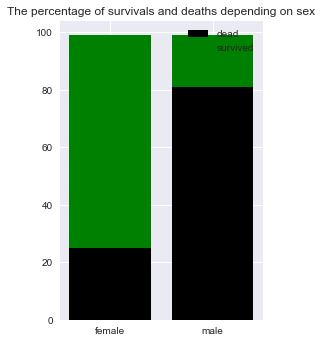

In [138]:
plt.subplot(121)
plt.title('The percentage of survivals and deaths depending on sex')
plt.bar([0, 1], survived_by_sex_proc[0], color='black', label='dead')
plt.bar([0, 1], survived_by_sex_proc[1], color='green', label='survived',bottom=survived_by_sex_proc[0])
plt.legend(loc='upper right')
plt.xticks([0.0, 1.0], ['female', 'male'])
plt.show()

Если мужчина, то шансы погибнуть выше, в 80% мужчины погибали, в противовес женщинам - около 25%.

Теперь проделываем тот же самый алгоритм для построения гистограммы шансах выжить в зависимости от класса.

In [101]:
survived_by_class= titanic.groupby(['Pclass', 'Survived']).size().unstack()
survived_by_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [102]:
survived_by_class_proc = (100 * survived_by_class.T / survived_by_class.T.sum()).T
survived_by_class_proc = survived_by_class_proc.astype(np.int)
survived_by_class_proc

Survived,0,1
Pclass,,
1,37,62
2,52,47
3,75,24


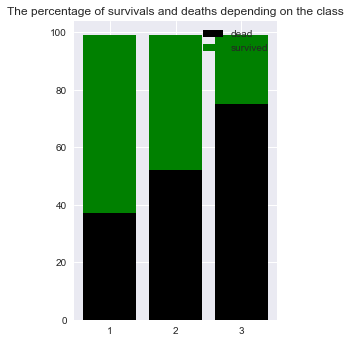

In [234]:
plt.subplot(121)
plt.title('The percentage of survivals and deaths depending on the class')

plt.bar([0, 1, 2], survived_by_class_proc[0], color='black', label='dead')
plt.bar([0, 1, 2], survived_by_class_proc[1], color='green', label='survived',bottom=survived_by_class_proc[0])
plt.legend(loc='upper right')
plt.xticks([0.0, 1.0, 2.0], ['1', '2', '3'])
plt.show()

Тут прямая зависимость от класса - чем выше класс, тем больше шансов выжить.

In [122]:
first_class = df[df['Pclass'] == 1]
first_class_mean = np.mean(np.array(first_class['Fare']).astype(np.int))
second_class = df[df['Pclass'] == 2]
second_class_mean = np.mean(np.array(second_class['Fare']).astype(np.int))
third_class = df[df['Pclass'] == 3]
third_class_mean = np.mean(np.array(third_class['Fare']).astype(np.int))

In [127]:
class_mean = [first_class_mean, second_class_mean, third_class_mean]

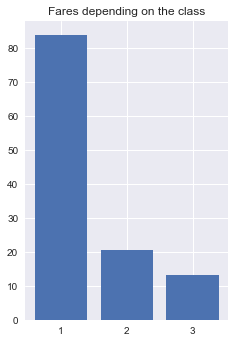

In [132]:
plt.subplot(121)
plt.title('Fares depending on the class')
plt.bar([0,1,2],class_mean)
plt.xticks([0.0, 1.0, 2.0], ['1', '2', '3'])
plt.show()


Стоимость билета зависит от класса, первый класс очень выдкляется, где стоимость билета больше 80 фунтов, в то время как 2 и 3 класс различаются не особо: около 20 фунтов(2 класс) и чуть меньше 15 - 3 класс.

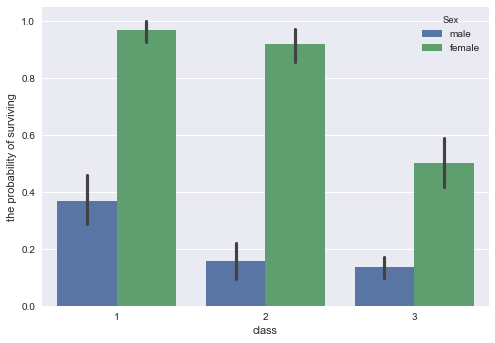

In [172]:
t = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
t.set(xlabel='class', ylabel='the probability of surviving')
plt.show()

У женщин из третьего класса больше шансов выжить, чем у мужчин первого класса. Кроме того, у женщин в общем больше шансов выжить. У мужчин второго и третьего класса примерно одинаковые шансы выжить.

S - survived, f - female, m - male , 1,2,3 - classes

P(F,S) > P(M,S) P(F,3,S) > P(M,1,S)

In [212]:
labels=['Fare', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch']

In [213]:
X, y = df[labels], df['Survived']

In [214]:
pd.options.mode.chained_assignment = None 

In [215]:
X['Sex']= pd.get_dummies(X['Sex'])

In [216]:
X

,Fare,Age,Sex,Pclass,SibSp,Parch
0,7.2500,22.0,0,3,1,0
1,71.2833,38.0,1,1,1,0
2,7.9250,26.0,1,3,0,0
3,53.1000,35.0,1,1,1,0
4,8.0500,35.0,0,3,0,0
5,8.4583,28.0,0,3,0,0
6,51.8625,54.0,0,1,0,0
7,21.0750,2.0,0,3,3,1
8,11.1333,27.0,1,3,0,2
9,30.0708,14.0,1,2,1,0


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 6), (268, 6), (623,), (268,))

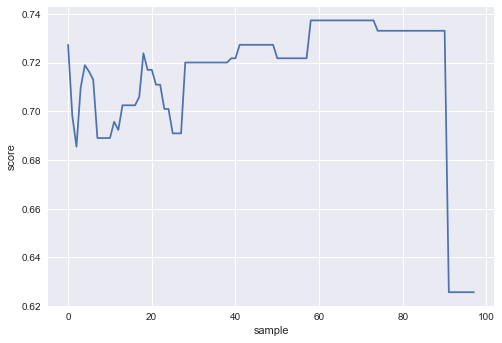

In [232]:
scores = []
for t in range(2, 100):
    dt_clf = DecisionTreeClassifier(min_samples_split=t)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(scores)
plt.xlabel('sample')
plt.ylabel('score')
plt.show()

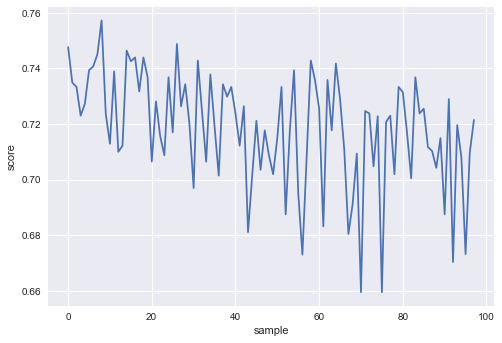

In [233]:
scores = []
for t in range(2, 100):
    rf_clf = RandomForestClassifier(min_samples_split=t)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(scores)
plt.xlabel('sample')
plt.ylabel('score')
plt.show()